In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
days = 1
#lr_data = np.array(eval(file.read()))
lr_data = pd.read_csv(f'results/elasticnetAR_predictions_5_{days}.txt', parse_dates=[1], index_col=0).set_index('Timestamp')
lr_data['V'] = lr_data['Prediction'].apply(lambda x: eval(x)[0])
lr_pred = lr_data['V'].values

svr_data = pd.read_csv(f'results/svr_predictions_5_{days}.txt', parse_dates=[1], index_col=0).set_index('Timestamp')
svr_data['V'] = svr_data['Prediction'].apply(lambda x: eval(x)[0])
svr_pred = svr_data['V'].values
# with open(f'results/svr_predictions_5_{days}.txt', 'r') as file:
    #svr_data = np.array(eval(file.read()))
lr_pred, svr_pred

(array([339.52767944, 349.9118546 , 346.94787065, ..., 408.6187865 ,
        403.93445059, 399.35707919]),
 array([337.95651158, 337.52716847, 336.87821364, ..., 386.79402995,
        388.03808354, 388.81921427]))

In [3]:
lr_data.shape, svr_data.shape

((8760, 2), (8760, 2))

In [4]:
# dset = pd.read_csv('GTA/data/solar_hour/test.csv', index_col=0)
dset = pd.read_csv('data/omni_1hr_clean.csv', index_col=0, parse_dates=[0]).dropna(how='any')
new_idx = pd.date_range(dset.index[0], dset.index[-1], freq='1h')
dset = dset.reindex(new_idx, fill_value=np.nan)
dset = dset.interpolate(method='time').rolling(1, center=True).mean()
dset

,BR,BT,BN,V,N,T
1996-08-01 00:00:00,1.5,-3.7,-3.3,498.0,3.3,143535.0
1996-08-01 01:00:00,5.1,-1.2,-0.7,492.0,2.7,121473.0
1996-08-01 02:00:00,3.2,-2.7,3.9,513.0,3.6,163789.0
1996-08-01 03:00:00,1.1,-2.1,-1.8,538.0,4.2,159645.0
1996-08-01 04:00:00,2.4,-3.0,1.9,539.0,4.5,199876.0
...,...,...,...,...,...,...
2021-12-31 20:00:00,-0.6,-2.0,4.2,418.0,7.8,78906.0
2021-12-31 21:00:00,-1.3,-2.4,3.4,423.0,8.6,88405.0
2021-12-31 22:00:00,1.1,-2.3,1.6,414.0,8.1,95631.0
2021-12-31 23:00:00,4.6,-2.8,-3.8,388.0,5.0,68545.0


In [5]:
shifted_3 = dset.shift(freq=f'{days}d').loc['2017-01-01':'2018-01-01']['V'].values
shifted_27 = dset.shift(freq='27d').loc['2017-01-01':'2018-01-01']['V'].values
shifted_3, shifted_27

(array([320., 326., 320., ..., 363., 363., 369.]),
 array([284., 284., 286., ..., 602., 607., 577.]))

In [6]:
dset = dset.loc['2017-01-01':'2018-01-01']
dset

,BR,BT,BN,V,N,T
2017-01-01 00:00:00,5.8,0.8,-2.4,552.0,7.1,184960.0
2017-01-01 01:00:00,4.6,1.0,-3.4,556.0,6.8,182557.0
2017-01-01 02:00:00,4.4,-1.1,-3.1,552.0,6.3,164171.0
2017-01-01 03:00:00,5.4,-2.0,-0.2,539.0,5.0,174900.0
2017-01-01 04:00:00,1.0,3.3,-2.8,543.0,5.9,161267.0
...,...,...,...,...,...,...
2018-01-01 19:00:00,3.1,-3.1,-0.5,460.0,3.9,90339.0
2018-01-01 20:00:00,-0.3,-4.6,-0.2,454.0,4.0,93723.0
2018-01-01 21:00:00,-1.9,-3.7,-2.3,446.0,4.0,86331.0
2018-01-01 22:00:00,-2.6,-3.6,-1.1,434.0,4.4,87308.0


In [7]:
import skill_metrics as sm

In [8]:
taylor_stats2 = sm.taylor_statistics(svr_pred, dset['V'].values[:len(svr_pred)], 'data')
taylor_stats3 = sm.taylor_statistics(lr_pred, dset['V'].values[:len(lr_pred)], 'data')
taylor_stats4 = sm.taylor_statistics(shifted_3, dset['V'].values, 'data')
taylor_stats5 = sm.taylor_statistics(shifted_27, dset['V'].values, 'data')

sdev = np.array([taylor_stats3['sdev'][0],
                 taylor_stats4['sdev'][1],
                 taylor_stats5['sdev'][1],
                 taylor_stats3['sdev'][1],
                 taylor_stats2['sdev'][1]])

crmsd = np.array([taylor_stats3['crmsd'][0],
                 taylor_stats4['crmsd'][1],
                 taylor_stats5['crmsd'][1],
                 taylor_stats3['crmsd'][1],
                 taylor_stats2['crmsd'][1]])

ccoef = np.array([taylor_stats3['ccoef'][0],
                 taylor_stats4['ccoef'][1],
                 taylor_stats5['ccoef'][1],
                 taylor_stats3['ccoef'][1],
                 taylor_stats2['ccoef'][1]])

taylor_stats2, taylor_stats3, taylor_stats4, taylor_stats5

({'ccoef': array([1.        , 0.70730505]),
  'crmsd': [0.0, 78.27223249027949],
  'sdev': [109.62580352212908, 66.5386953931239]},
 {'ccoef': array([1.        , 0.77865778]),
  'crmsd': [0.0, 68.82133440241776],
  'sdev': [109.62580352212908, 83.11219693803675]},
 {'ccoef': array([1.        , 0.69076445]),
  'crmsd': [0.0, 86.15322108750657],
  'sdev': [109.48732052438011, 109.61219929820375]},
 {'ccoef': array([1.        , 0.55775662]),
  'crmsd': [0.0, 104.81114659642509],
  'sdev': [109.48732052438011, 113.2890688302738]})

# Taylor diagram

### Small note for interpretation
$\sigma$ and $\text{CC}$ are well defined quantity, and do not diverge from the usually accepted definition in ML. However, $\text{RMSD}$ and $\text{RMSE}$ are not exactly the same. To provide a proper point of comparison, let $f$ denote the values in set $F$ predicted by an estimator, and $o$ refer to the values in the set of observations $O$, then:
- $\text{RMSE} = \sqrt{\frac{1}{N}\sum_{i\in N}(o-f)^2}$
- $\text{RMSD} = \sqrt{\frac{1}{N}\sum_{i\in N}[(o-\bar{o})-(f-\bar{f})]^2}$

In other words, $\text{RMSE}$ measures the average difference in value between a estimate and observation. On the other hand, $\text{RMSD}$ measure the difference in deviation from the mean between estimate and observation.

An interesting detail to note is that, although the signed nature of the result leads to similar values when the distributions of estimates and observations are similar, this may not apply when we have largely different distributions. As an example, consider the following (actual) scenario:

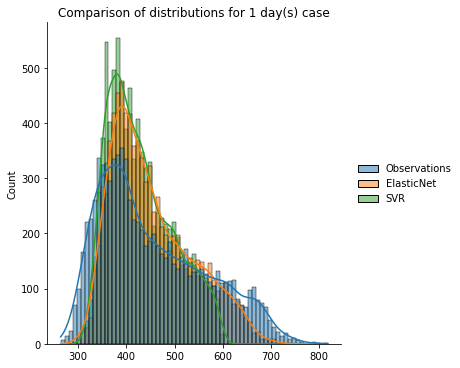

In [9]:
trimmed_v = dset['V'].values[:len(lr_pred)]
d = {'Observations': trimmed_v,
    'ElasticNet': lr_pred,
    'SVR': svr_pred}
ax = sns.displot(data=pd.DataFrame(d), kind='hist', kde=True, fill=True, stat='count', multiple='layer')
plt.title(f'Comparison of distributions for {days} day(s) case');

Note that persistence models have been omitted in the intereste of interpretability. Consider the three distributions shown: observations are decidedly not Gaussian in their distribution. ElasticNet and SVR estimates, while still not Gaussian, are much closer to the shape we would expect. Let us inspect the statistical properties of the three:

In [10]:
pd.DataFrame(d).describe()

,Observations,ElasticNet,SVR
count,8760.000000,8760.000000,8760.000000
mean,454.653482,451.775765,429.326604
std,109.632061,83.116941,66.542494
min,264.000000,292.235431,314.157993
25%,367.000000,387.061614,376.637412
50%,426.000000,431.636872,415.674805
75%,533.000000,505.984999,474.855333
max,817.000000,735.366059,599.323782


Again, we see that observations have a decidedly wider distribution. We are, however, interested in the means. We see that between observation and ElasticNet there is a difference of only $10$ km$\cdot$s$^{-1}$: considering our value range, this difference is negligible. The difference between the means of observation and SVR estimates is triple that: it introduces a larger divergence between $\text{RMSD}$ and $\text{RMSE}$.

As a final note, remember that $\sigma$, $\text{CC}$ and $\text{RMSD}$ conform to the triangle inequality, providing geometrical meaning to the exact position of points on the polar diagram we produce.

### Taylor diagram

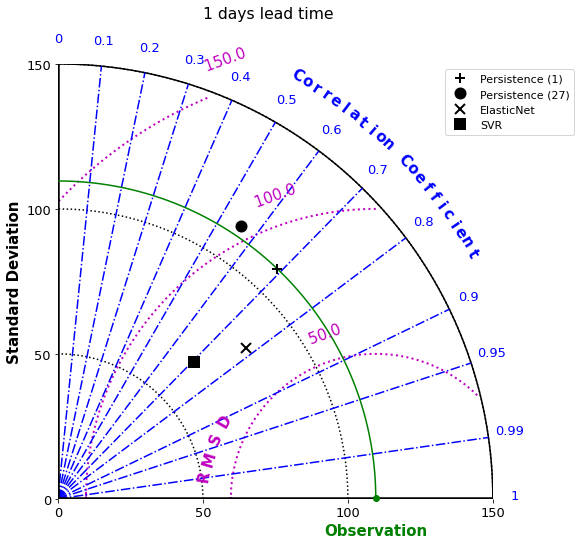

In [11]:
plt.rcParams.update({'font.size': 13})
plt.figure(figsize=(8, 8))
label = ['Non-Dimensional Observation', f'Persistence ({days})', 'Persistence (27)', 'ElasticNet', 'SVR']
sm.taylor_diagram(sdev,crmsd,ccoef, styleOBS = '-', 
                      colOBS = 'g', markerobs = 'o', markerColor='k',
                      titleOBS = 'Observation',
                  markerLabel = label,
                      markerLabelColor = 'k', markerLegend = 'on', 
                      tickRMSangle = 110.0,
                      colRMS = 'm', styleRMS = ':', widthRMS = 2.0, 
                      titleRMS = 'on', checkstats=True)
plt.suptitle(f'{days} days lead time')
plt.savefig(f'figs/skill_{5*24}_{days*24}.png', bbox_inches='tight')
plt.show()

In [12]:
target_stats2 = sm.target_statistics(svr_pred, dset['V'].values[:len(svr_pred)], 'data')
target_stats3 = sm.target_statistics(lr_pred, dset['V'].values[:len(lr_pred)], 'data')
target_stats4 = sm.target_statistics(shifted_3, dset['V'].values, 'data')
target_stats5 = sm.target_statistics(shifted_27, dset['V'].values, 'data')

bias = np.array([target_stats4['bias'],
                 target_stats5['bias'],
                 target_stats3['bias'],
                 target_stats2['bias']])

crmsd = np.array([target_stats4['crmsd'],
                 target_stats5['crmsd'],
                 target_stats3['crmsd'],
                 target_stats2['crmsd']])

rmsd = np.array([target_stats4['rmsd'],
                 target_stats5['rmsd'],
                 target_stats3['rmsd'],
                 target_stats2['rmsd']])

target_stats2, target_stats3, target_stats4, target_stats5

({'bias': -25.326878202373166,
  'crmsd': 78.27223249027949,
  'rmsd': 82.26781350254915,
  'type': 'unnormalized'},
 {'bias': -2.8777162719484295,
  'crmsd': 68.82133440241776,
  'rmsd': 68.88147297983143,
  'type': 'unnormalized'},
 {'bias': -0.07798269581059003,
  'crmsd': 86.15322108750657,
  'rmsd': 86.15325638101925,
  'type': 'unnormalized'},
 {'bias': 4.847108378870644,
  'crmsd': 104.81114659642509,
  'rmsd': 104.92316670065685,
  'type': 'unnormalized'})

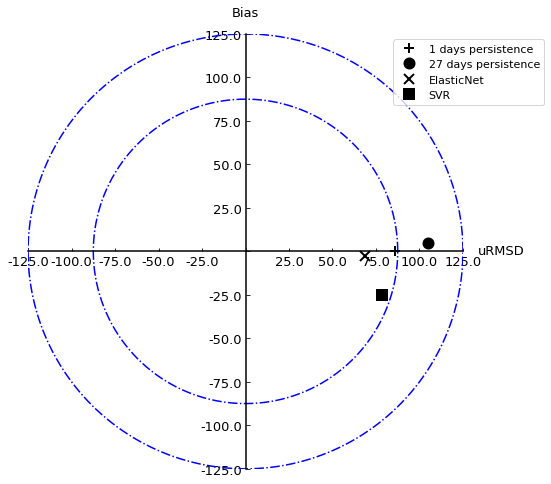

In [13]:
label = [f'{days} days persistence', '27 days persistence', 'ElasticNet', 'SVR']
plt.figure(figsize=(8, 8))
sm.target_diagram(bias,crmsd,rmsd, markerLabel=label, markerLegend='on', markerColor='k', circleLineSpec = 'b-.');